In [26]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dev_json = pd.read_json("data/public_dat/dev.jsonl", lines=True)
dev_json

,senences,id
0,Генерал Д.Петреус назначен на пост главы ЦРУ.\...,519
1,Подозреваемые в нападении на Charlie Hebdo зах...,520
2,Скончалась Джанет Рено — первая женщина-генпро...,521
3,Школьник из Иванова получил «Золотой крест» за...,522
4,Врачи установили причину смерти Сергея Доренко...,523
...,...,...
60,Первый афроамериканец-астронавт всё же отправи...,579
61,Медведев уволил Суходольского с должности глав...,580
62,ГУ МВД по городу Москве не знает московских за...,581
63,Умер последний король Руанды Кигели V\n\nКигел...,582


In [12]:
dev_json.iloc[0]

senences    Генерал Д.Петреус назначен на пост главы ЦРУ.\...
id                                                        519
Name: 0, dtype: object

In [13]:
train_json = pd.read_json("data/public_dat/train.jsonl", lines=True)
train_json

,ners,sentences,id
0,"[[0, 5, CITY], [16, 23, PERSON], [34, 41, PERS...",Бостон взорвали Тамерлан и Джохар Царнаевы из ...,0
1,"[[21, 28, PROFESSION], [53, 67, ORGANIZATION],...",Умер избитый до комы гитарист и сооснователь г...,1
2,"[[0, 4, PERSON], [37, 42, COUNTRY], [47, 76, O...",Путин подписал распоряжение о выходе России из...,2
3,"[[0, 11, PERSON], [36, 47, PROFESSION], [49, 6...",Бенедикт XVI носил кардиостимулятор\nПапа Римс...,3
4,"[[0, 4, PERSON], [17, 29, ORGANIZATION], [48, ...",Обама назначит в Верховный суд латиноамериканк...,4
...,...,...,...
514,"[[42, 46, COUNTRY], [82, 87, COUNTRY], [104, 1...",Глава Малайзии: мы не хотим противостоять Кита...,514
515,"[[1, 4, PRODUCT], [31, 33, FACILITY], [35, 44,...",«Союз» впервые пристыковался к МКС за 6 часов\...,515
516,"[[0, 4, PERSON], [8, 12, PERSON], [45, 52, AGE...",Трамп и Путин сделали совместное заявление к 7...,516
517,"[[0, 9, NATIONALITY], [58, 72, PERSON], [101, ...",Российский магнат устроил самую дорогую свадьб...,517


In [54]:
entities = set()
single_freq = {}
for index, row in train_json.iterrows():
    for i in range(len(row.ners)):
        entities.add(row.ners[i][2])
        single_freq[row.ners[i][2]] = single_freq.get(row.ners[i][2], 0) + 1
        
entities = sorted(list(entities))
print(", ".join(entities))

AGE, AWARD, CITY, COUNTRY, CRIME, DATE, DISEASE, DISTRICT, EVENT, FACILITY, FAMILY, IDEOLOGY, LANGUAGE, LAW, LOCATION, MONEY, NATIONALITY, NUMBER, ORDINAL, ORGANIZATION, PENALTY, PERCENT, PERSON, PRODUCT, PROFESSION, RELIGION, STATE_OR_PROVINCE, TIME, WORK_OF_ART


<BarContainer object of 29 artists>

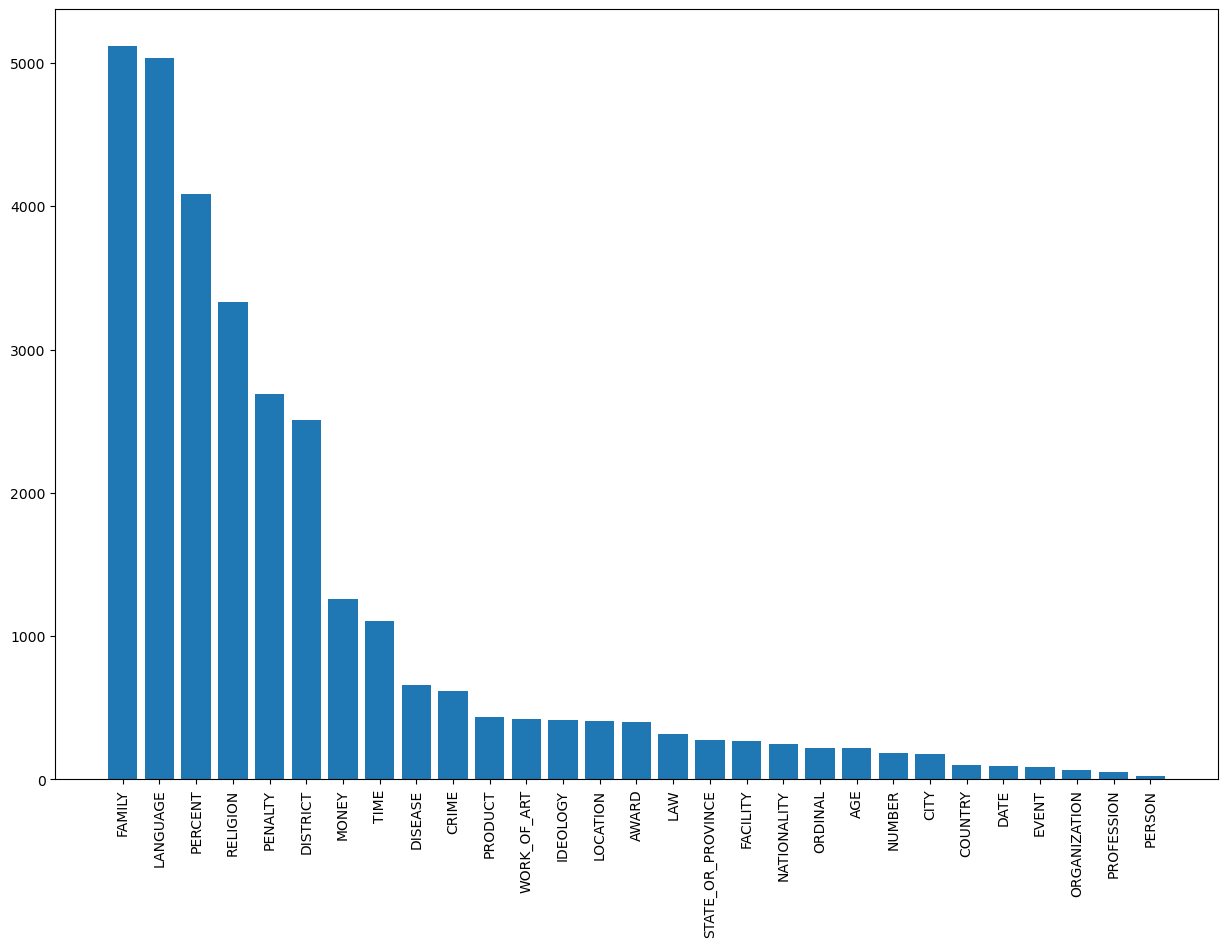

In [62]:
f = plt.figure(figsize=(15, 10))
plt.xticks(ticks=[i for i in range(len(entities))], labels=entities, fontsize=10, rotation=90)
entities = sorted(entities, key=lambda x: single_freq[x], reverse=True)
plt.bar(entities, [single_freq[x] for x in entities])

In [63]:
freq_matrix = [[0 for i in range(len(entities))] for j in range(len(entities))]

for index, row in train_json.iterrows():
    for i in range(0, len(row.ners)-1):
        right_idx = row.ners[i][1]
        for j in range(i+1, len(row.ners)):
            if row.ners[j][0] < right_idx:
                # intersection
                f_idx = entities.index(row.ners[i][2])
                s_idx = entities.index(row.ners[i-1][2])
                freq_matrix[f_idx][s_idx] += 1
                freq_matrix[s_idx][f_idx] += 1
            else:
                break



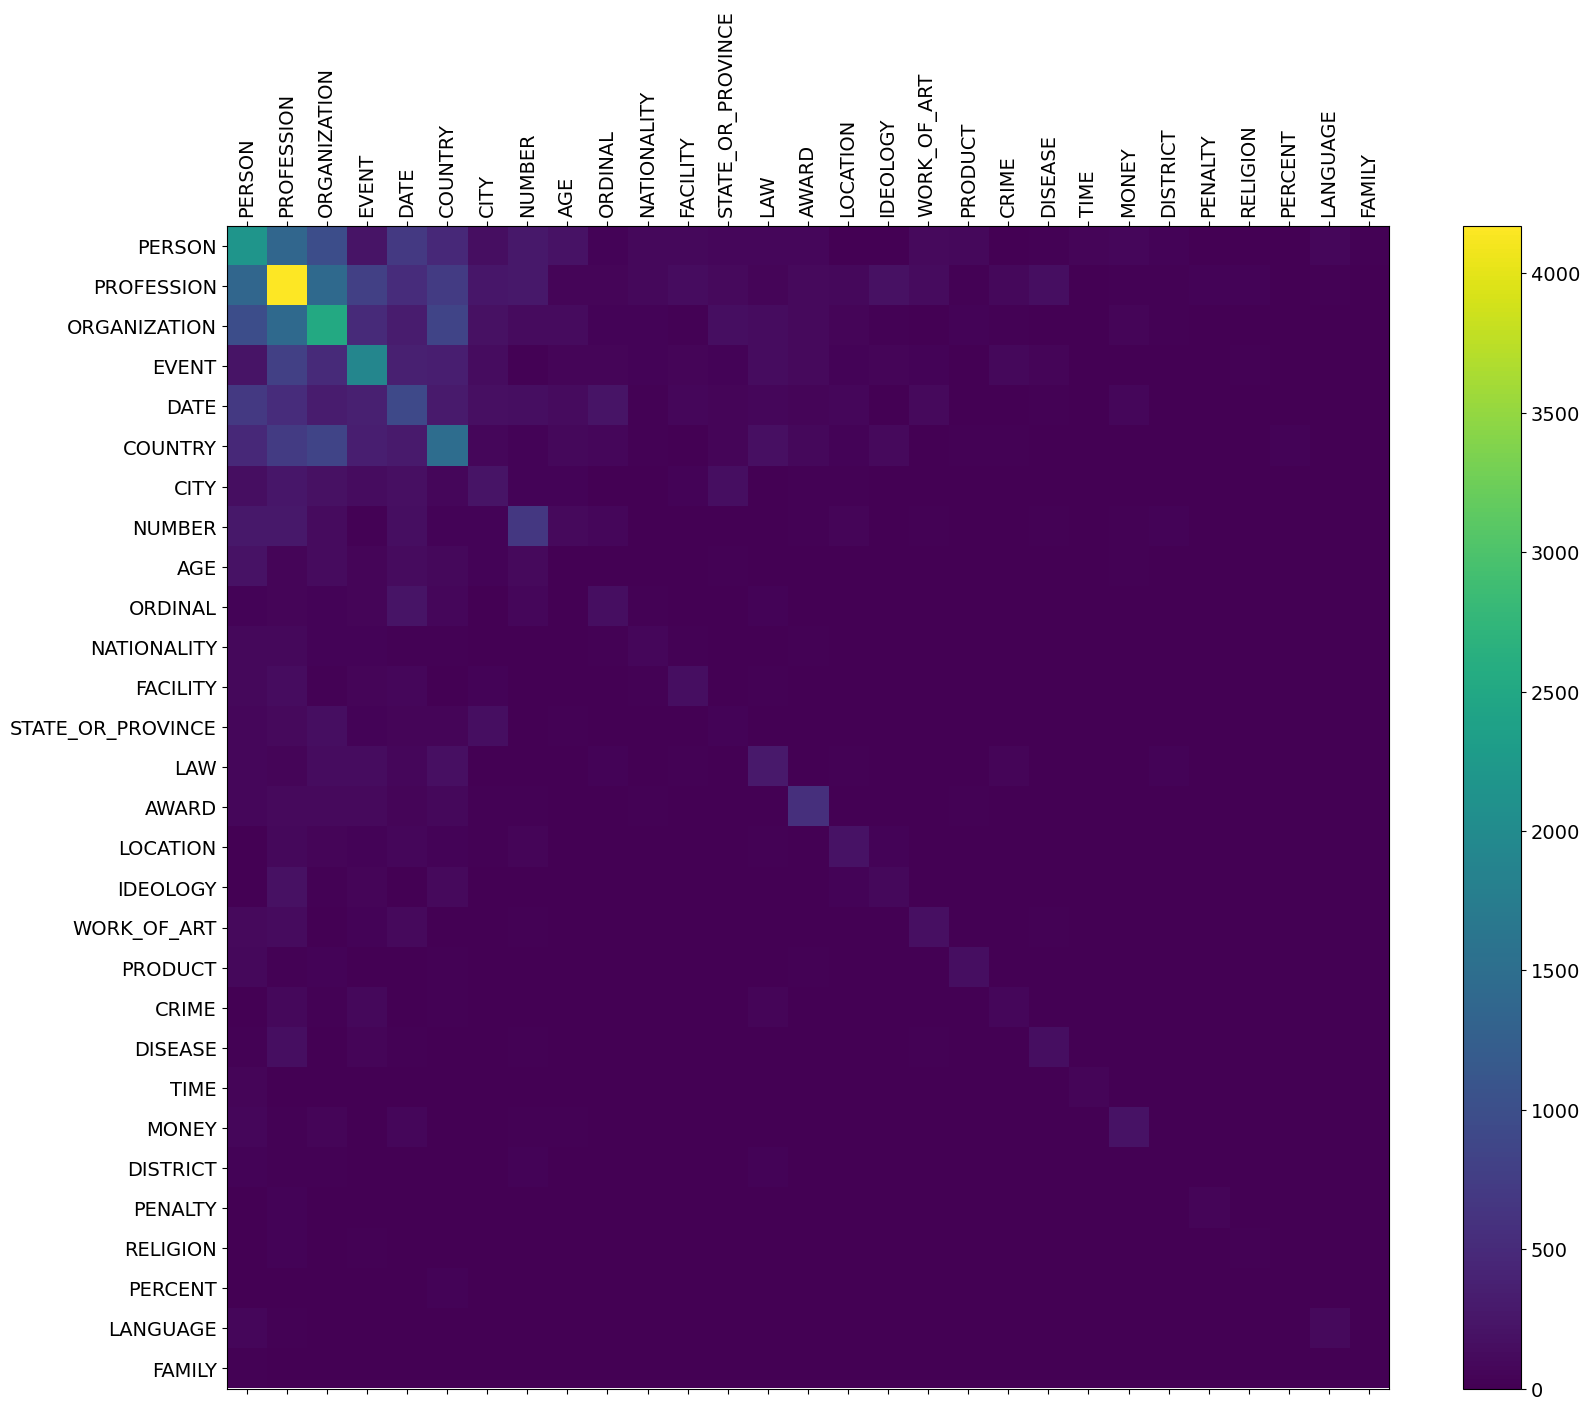

In [64]:
f = plt.figure(figsize=(19, 15))
plt.matshow(freq_matrix, fignum=f.number)
plt.xticks(ticks=[i for i in range(len(entities))], labels=entities, fontsize=14, rotation=90)
plt.yticks(ticks=[i for i in range(len(entities))], labels=entities, fontsize=14, rotation=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()